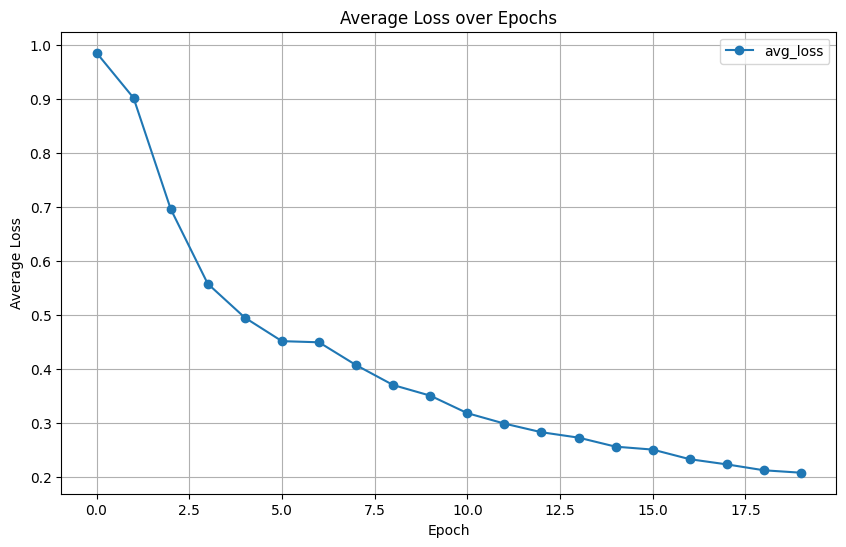

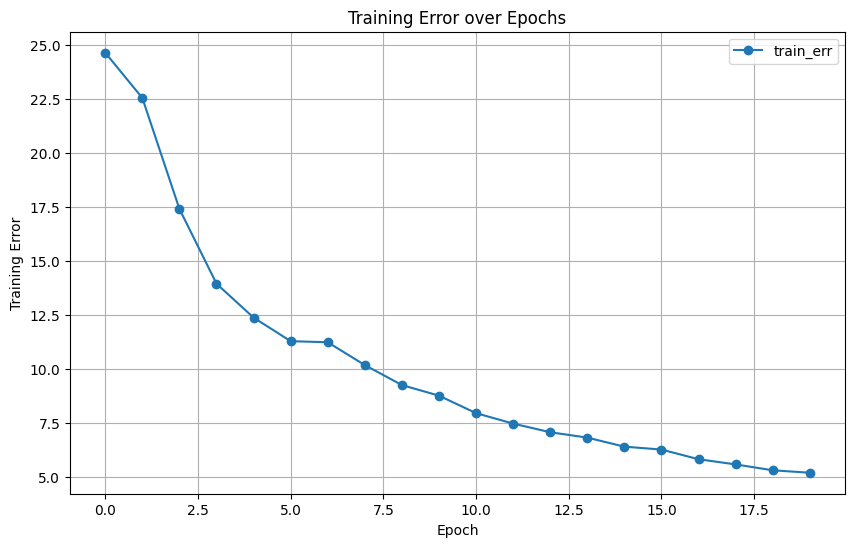

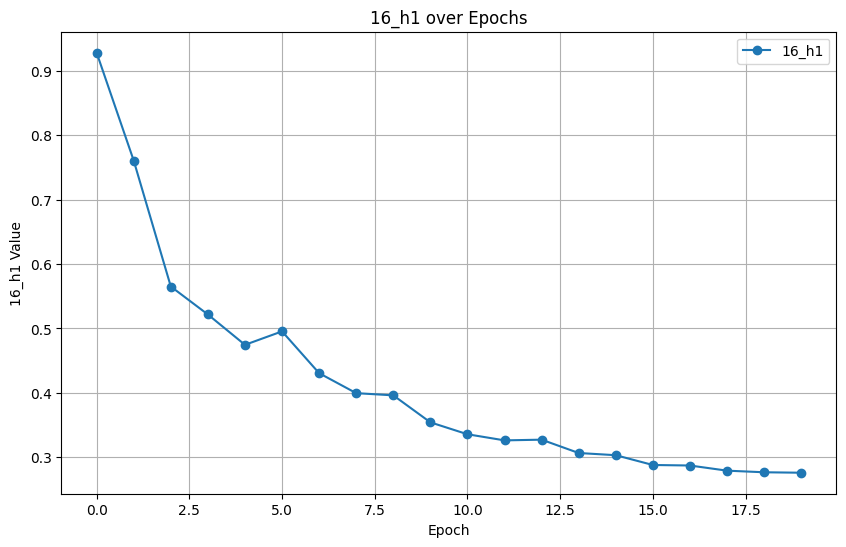

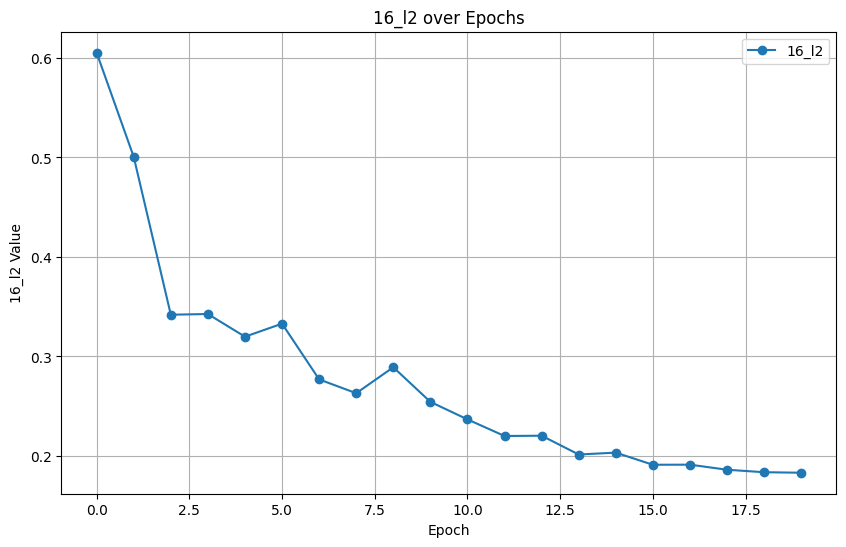

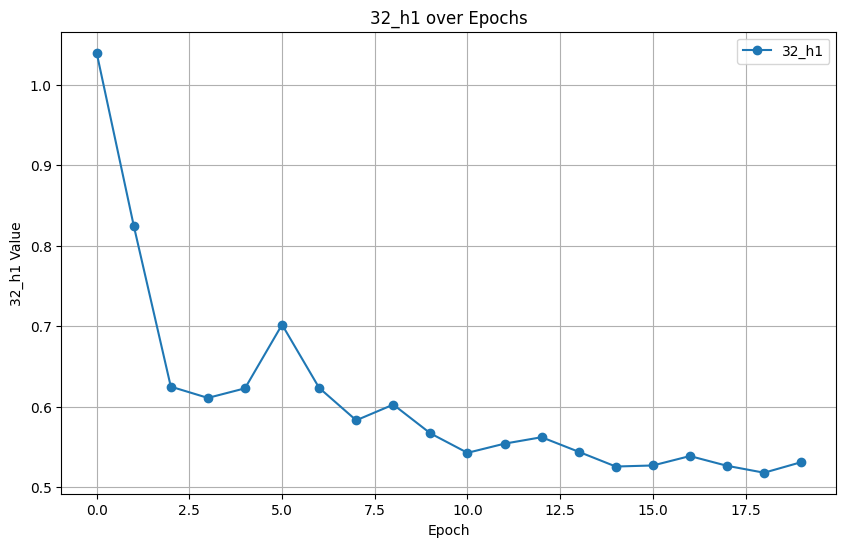

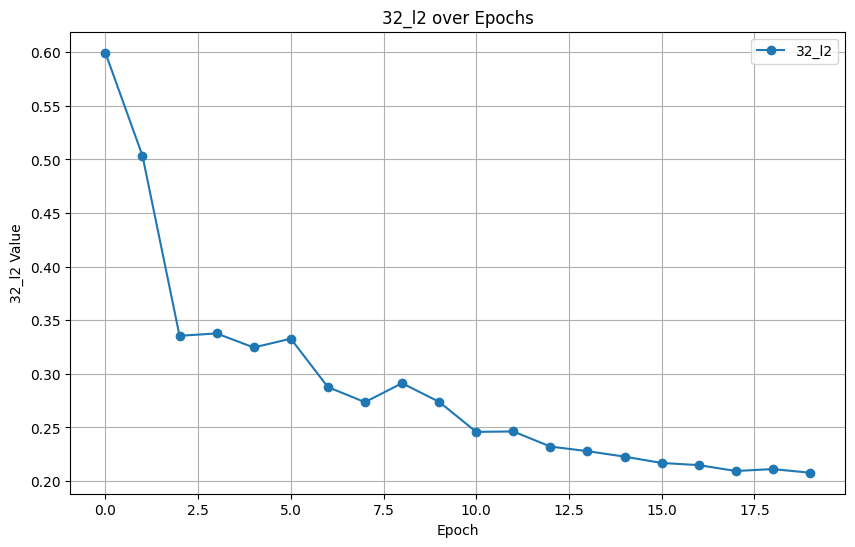

In [2]:
import re
import matplotlib.pyplot as plt

directory_name = "Y-01-22_04:19:59"

# stdout.txtからデータを読み込む
with open("../results/FNO/" + directory_name + "/stdout.txt", "r") as file:
    log = file.read()

# avg_lossとtrain_errの抽出
loss_err_pattern = r'\[\d+\] time=[\d\.]+, avg_loss=([\d\.]+), train_err=([\d\.]+)'
loss_err_data = re.findall(loss_err_pattern, log)
avg_loss = [float(data[0]) for data in loss_err_data]
train_err = [float(data[1]) for data in loss_err_data]

# Eval行からデータを抽出
eval_pattern = r'Eval: (.*?)\s*$'
eval_data = re.findall(eval_pattern, log, flags=re.MULTILINE)

# Evalの各項目の抽出と保存
eval_dict = {}
for line in eval_data:
    metrics = line.split(',')
    for metric in metrics:
        key_value = metric.split('=')
        if len(key_value) == 2:
            key = key_value[0].strip()
            value = float(key_value[1].strip())
            if key not in eval_dict:
                eval_dict[key] = []
            eval_dict[key].append(value)

# グラフを作成
# avg_lossとtrain_errのグラフ
epochs = list(range(len(avg_loss)))

plt.figure(figsize=(10, 6))
plt.plot(epochs, avg_loss, marker='o', label='avg_loss')
plt.title('Average Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_err, marker='o', label='train_err')
plt.title('Training Error over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.grid(True)
plt.legend()
plt.show()

# Evalの各指標に対するグラフ
for key, values in eval_dict.items():
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, values, marker='o', label=key)
    plt.title(f'{key} over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel(f'{key} Value')
    plt.grid(True)
    plt.legend()
    plt.show()
